<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/Images/SN_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


<h1>Extracting Stock Data Using a Python Library</h1>


A company's stock share is a piece of the company more precisely:
<p><b>A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This
entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." [1]</p></b>

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day the stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges.
<p>You are a data scientist working for a hedge fund; it's your job to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. We will use the <coode>yfinance</code> library, it allows us to extract data for stocks returning data in a pandas dataframe. You will use the lab to extract.</p>


In [50]:
import yfinance as yf
import pandas as pd
import matplotlib as plt

## Using the yfinance Library to Extract Stock Data


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [51]:
apple = yf.Ticker("AAPL")

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.


### Stock Info


Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.


In [52]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of data variable
    #print("Type:", type(apple_info))
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

We can get the <code>'country'</code> using the key country


In [53]:
apple_info['country']

'United States'

### Extracting Share Price


A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [54]:
apple.info
apple_share_price_data = apple.history(period = "2y")

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [55]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-06 00:00:00-05:00,185.111817,187.538893,185.022663,187.528992,43490800,0.00,0.0
2024-02-07 00:00:00-05:00,188.856443,189.262611,186.845436,187.637955,53439000,0.00,0.0
2024-02-08 00:00:00-05:00,187.618164,187.766754,185.597255,186.558182,40962000,0.00,0.0
2024-02-09 00:00:00-05:00,187.123521,188.452690,186.478786,187.321915,45155200,0.24,0.0
2024-02-12 00:00:00-05:00,186.895409,187.143386,185.278593,185.635681,41781900,0.00,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [56]:
apple_share_price_data.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:


<Axes: xlabel='Date'>

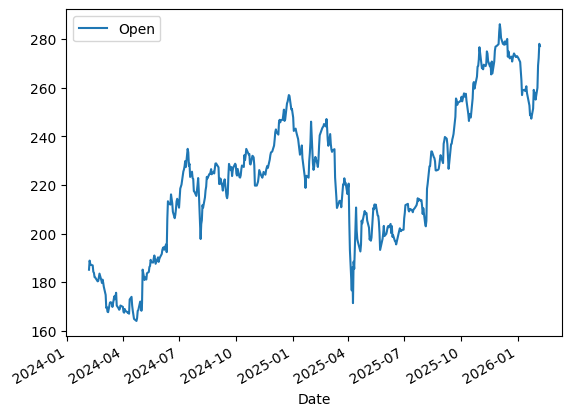

In [57]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.


In [58]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2024-11-08 00:00:00-05:00    0.250000
2025-02-10 00:00:00-05:00    0.250000
2025-05-12 00:00:00-04:00    0.260000
2025-08-11 00:00:00-04:00    0.260000
2025-11-10 00:00:00-05:00    0.260000
Name: Dividends, Length: 89, dtype: float64

We can plot the dividends overtime:


<Axes: xlabel='Date'>

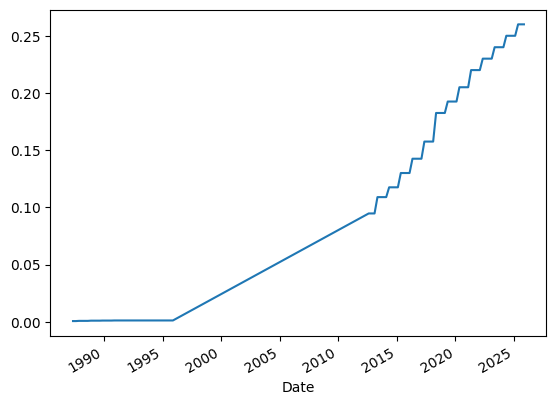

In [59]:
apple.dividends.plot()

## Exercise


Now using the `Ticker` module create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object <code>amd</code>.


In [60]:
# Create an AMD Ticker object
amd = yf.Ticker("AMD")
amd

yfinance.Ticker object <AMD>

In [61]:
import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of data variable
    #print("Type:", type(apple_info))
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

<b>Question 1</b> Use the key  <code>'country'</code> to find the country the stock belongs to, remember it as it will be a quiz question.


In [62]:
# Question 1: Country the stock belongs to
print('Country:', amd_info.get('country'))

Country: United States


In [63]:
# Question 2: Sector the stock belongs to
print('Sector:', amd_info.get('sector'))

Sector: Technology


In [64]:
# Question 3: Obtain AMD history (max) and find Volume on first day
amd_share_price_data = amd.history(period="max")
display(amd_share_price_data.head(1))
first_volume = amd_share_price_data['Volume'].iloc[0]
print('Volume on first day:', first_volume)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,3.125,3.302083,3.125,3.145833,219600,0.0,0.0


Volume on first day: 219600


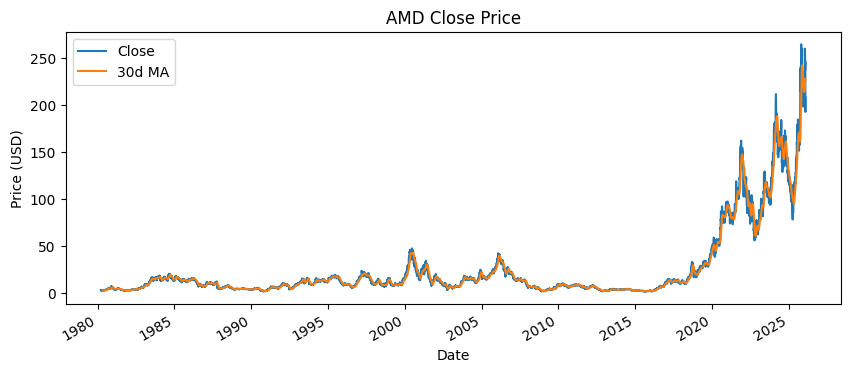

In [66]:
# AMD plotting: Close price and 30-day rolling mean
import matplotlib.pyplot as plt
amd_share_price_data['Close'].plot(figsize=(10,4), title='AMD Close Price')
amd_share_price_data['Close'].rolling(window=30).mean().plot(label='30d MA')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

## Comparative Analysis: AMD vs Apple

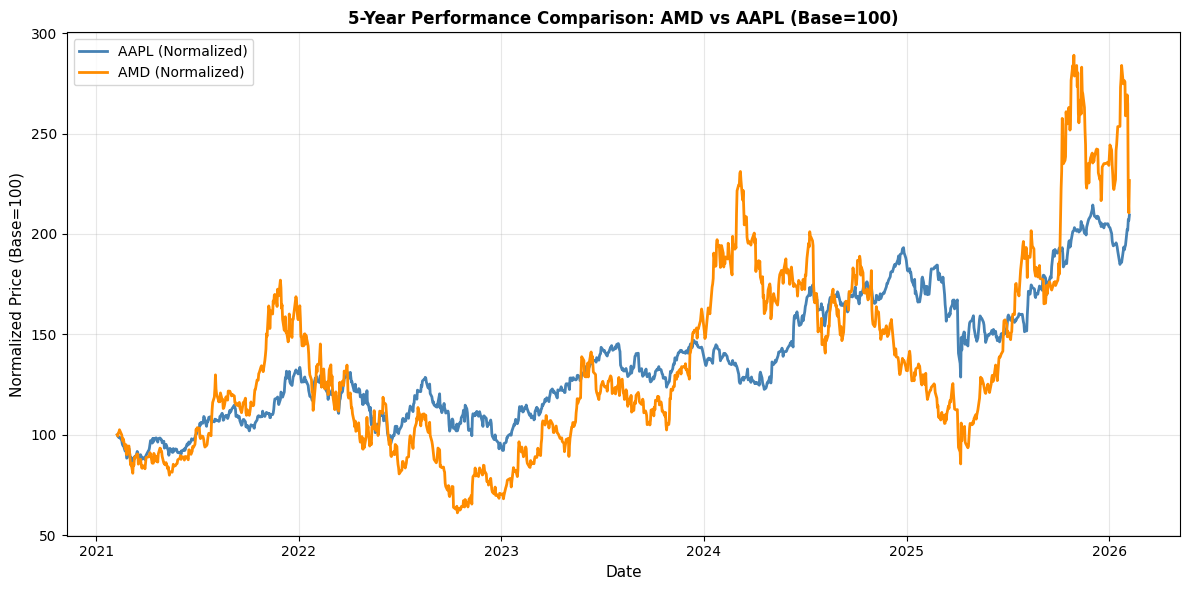

5-Year Performance Summary:
AAPL: 209.47x (from 100)
AMD:  226.59x (from 100)


In [67]:
# Get 5-year data for both stocks
amd_5y = amd.history(period="5y")['Close']
aapl_5y = apple.history(period="5y")['Close']

# Align dates and normalize to base=100
df_5y = pd.concat([aapl_5y, amd_5y], axis=1, keys=['AAPL', 'AMD']).dropna()

if not df_5y.empty:
    df_5y_norm = df_5y.divide(df_5y.iloc[0]).multiply(100)
    
    plt.figure(figsize=(12, 6))
    plt.plot(df_5y_norm.index, df_5y_norm['AAPL'], label='AAPL (Normalized)', linewidth=2, color='steelblue')
    plt.plot(df_5y_norm.index, df_5y_norm['AMD'], label='AMD (Normalized)', linewidth=2, color='darkorange')
    plt.xlabel('Date', fontsize=11)
    plt.ylabel('Normalized Price (Base=100)', fontsize=11)
    plt.title('5-Year Performance Comparison: AMD vs AAPL (Base=100)', fontsize=12, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f'5-Year Performance Summary:')
    print(f'AAPL: {df_5y_norm["AAPL"].iloc[-1]:.2f}x (from {df_5y_norm["AAPL"].iloc[0]:.0f})')
    print(f'AMD:  {df_5y_norm["AMD"].iloc[-1]:.2f}x (from {df_5y_norm["AMD"].iloc[0]:.0f})')
else:
    print('Insufficient overlapping data for 5-year comparison.')


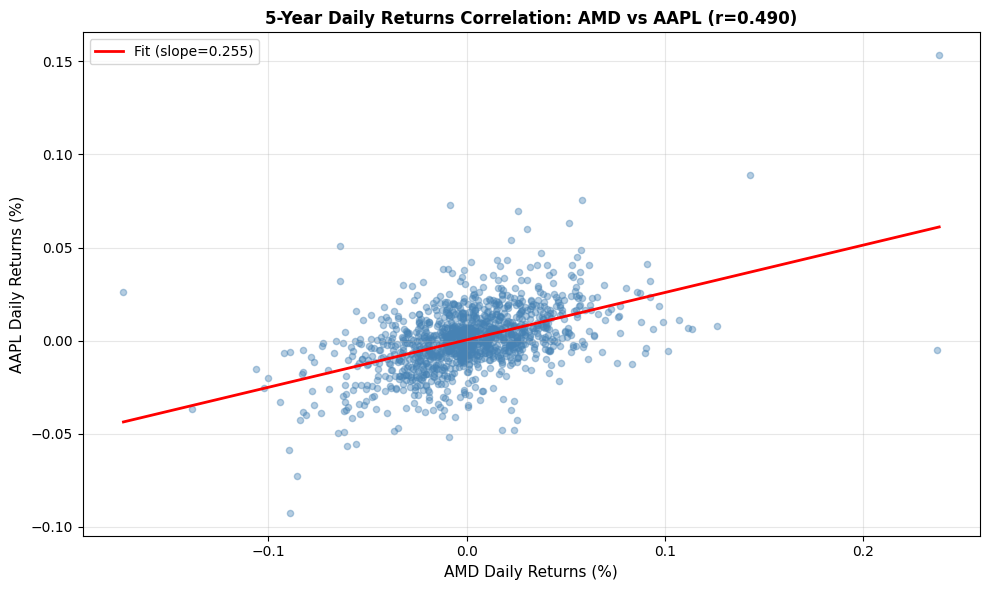


5-Year Returns Analysis:
Correlation Coefficient: 0.4898
Sample Size: 1255 trading days
AMD Avg Daily Return: 0.121%
AAPL Avg Daily Return: 0.074%


In [68]:
# Analyze daily returns correlation over 5-year period
amd_ret = amd_5y.pct_change().rename('AMD')
aapl_ret = aapl_5y.pct_change().rename('AAPL')

# Align returns data
rets = pd.concat([aapl_ret, amd_ret], axis=1).dropna()

if not rets.empty and len(rets) > 1:
    corr_5y = rets.corr().iloc[0, 1]
    
    # Create scatter plot with regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(rets['AMD'], rets['AAPL'], alpha=0.4, s=20, color='steelblue')
    
    # Fit a line
    import numpy as np
    z = np.polyfit(rets['AMD'].dropna(), rets['AAPL'].dropna(), 1)
    p = np.poly1d(z)
    xx = np.linspace(rets['AMD'].min(), rets['AMD'].max(), 100)
    plt.plot(xx, p(xx), 'r-', linewidth=2, label=f'Fit (slope={z[0]:.3f})')
    
    plt.xlabel('AMD Daily Returns (%)', fontsize=11)
    plt.ylabel('AAPL Daily Returns (%)', fontsize=11)
    plt.title(f'5-Year Daily Returns Correlation: AMD vs AAPL (r={corr_5y:.3f})', fontsize=12, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f'\n5-Year Returns Analysis:')
    print(f'Correlation Coefficient: {corr_5y:.4f}')
    print(f'Sample Size: {len(rets)} trading days')
    print(f'AMD Avg Daily Return: {rets["AMD"].mean()*100:.3f}%')
    print(f'AAPL Avg Daily Return: {rets["AAPL"].mean()*100:.3f}%')
else:
    print('Insufficient overlapping returns data for 5-year analysis.')


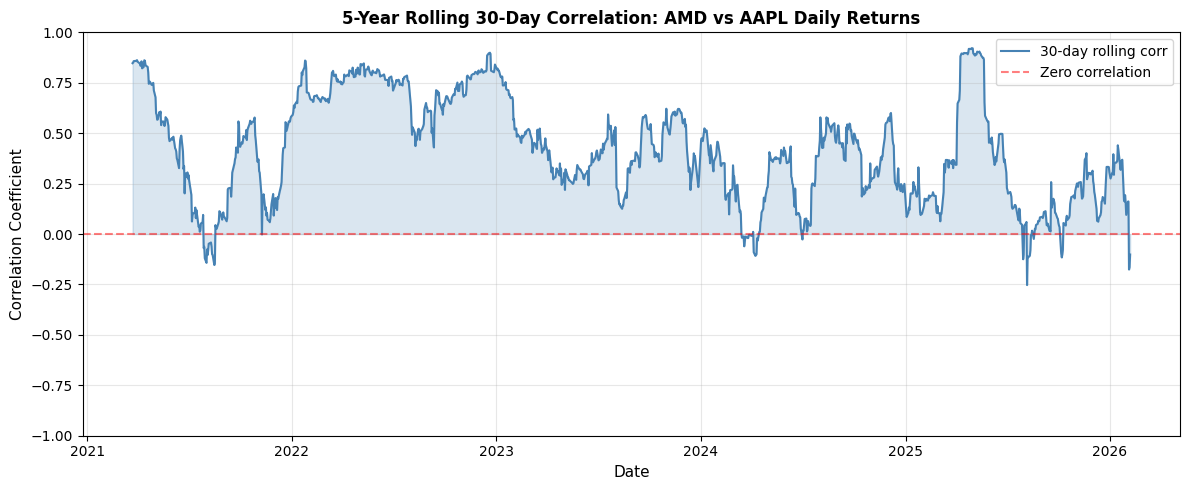


Rolling 30-Day Correlation Statistics:
Mean: 0.4192
Median: 0.4060
Min: -0.2530
Max: 0.9213
Std Dev: 0.2602


In [69]:
# Rolling correlation: how correlation evolves over the 5-year period
# Use 30-day rolling window for better visibility on shorter data span
rolling_window = 30

if len(rets) >= rolling_window:
    rolling_corr = rets['AMD'].rolling(window=rolling_window).corr(rets['AAPL'])
    
    plt.figure(figsize=(12, 5))
    plt.plot(rolling_corr.index, rolling_corr.values, linewidth=1.5, color='steelblue', label=f'{rolling_window}-day rolling corr')
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Zero correlation')
    plt.fill_between(rolling_corr.index, rolling_corr.values, 0, alpha=0.2, color='steelblue')
    plt.xlabel('Date', fontsize=11)
    plt.ylabel('Correlation Coefficient', fontsize=11)
    plt.title(f'5-Year Rolling {rolling_window}-Day Correlation: AMD vs AAPL Daily Returns', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    plt.ylim([-1, 1])
    plt.tight_layout()
    plt.show()
    
    print(f'\nRolling {rolling_window}-Day Correlation Statistics:')
    print(f'Mean: {rolling_corr.mean():.4f}')
    print(f'Median: {rolling_corr.median():.4f}')
    print(f'Min: {rolling_corr.min():.4f}')
    print(f'Max: {rolling_corr.max():.4f}')
    print(f'Std Dev: {rolling_corr.std():.4f}')
else:
    print(f'Insufficient data for rolling correlation (need at least {rolling_window} overlapping days).')
